# Lab 07-1 Tips

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# For reproducibility
torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])
# |x_train| = (m, 3)
# |y_train| = (m,)

In [ ]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

In [ ]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 3)
  def forward(self, x):
    return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# setting optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):

    # compute H(x)
    prediction = model(x_train)

    # comput cost
    cost = F.cross_entropy(prediction, y_train)

    # update H(x) using cost

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [ ]:
def test(model, optimizer, x_test, y_test):
  prediction = model(x_test)
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test)

  print('Accuracy: {} % Cost: {:.6f}'.format(correct_count / len(y_test) * 100, cost.item()))

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0 / 20 Cost : 2.203667
Epoch    1 / 20 Cost : 1.199645
Epoch    2 / 20 Cost : 1.142985
Epoch    3 / 20 Cost : 1.117769
Epoch    4 / 20 Cost : 1.100901
Epoch    5 / 20 Cost : 1.089523
Epoch    6 / 20 Cost : 1.079872
Epoch    7 / 20 Cost : 1.071320
Epoch    8 / 20 Cost : 1.063325
Epoch    9 / 20 Cost : 1.055720
Epoch   10 / 20 Cost : 1.048378
Epoch   11 / 20 Cost : 1.041245
Epoch   12 / 20 Cost : 1.034285
Epoch   13 / 20 Cost : 1.027478
Epoch   14 / 20 Cost : 1.020813
Epoch   15 / 20 Cost : 1.014279
Epoch   16 / 20 Cost : 1.007872
Epoch   17 / 20 Cost : 1.001586
Epoch   18 / 20 Cost : 0.995419
Epoch   19 / 20 Cost : 0.989365


In [ ]:
test(model, optimizer ,x_test, y_test)


Accuracy: 0.0 % Cost: 1.425844


## Learning Rate

If learning rate is too big, it diverges and cost will increase. (Overshooting)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1e5)

In [ ]:
# cost is increasing since learning rate is too big !
train(model, optimizer, x_train, y_train)

Epoch    0 / 20 Cost : 1.280268
Epoch    1 / 20 Cost : 976950.750000
Epoch    2 / 20 Cost : 1279135.125000
Epoch    3 / 20 Cost : 1198378.875000
Epoch    4 / 20 Cost : 1098825.750000
Epoch    5 / 20 Cost : 1968197.625000
Epoch    6 / 20 Cost : 284763.281250
Epoch    7 / 20 Cost : 1532260.125000
Epoch    8 / 20 Cost : 1651503.875000
Epoch    9 / 20 Cost : 521878.500000
Epoch   10 / 20 Cost : 1397263.250000
Epoch   11 / 20 Cost : 750986.250000
Epoch   12 / 20 Cost : 918691.375000
Epoch   13 / 20 Cost : 1487888.250000
Epoch   14 / 20 Cost : 1582260.125000
Epoch   15 / 20 Cost : 685818.125000
Epoch   16 / 20 Cost : 1140048.750000
Epoch   17 / 20 Cost : 940566.375000
Epoch   18 / 20 Cost : 931638.250000
Epoch   19 / 20 Cost : 1971322.625000


If learning rate is too small, cost may not decreasing 

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1e-10)

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0 / 20 Cost : 3.187324
Epoch    1 / 20 Cost : 3.187324
Epoch    2 / 20 Cost : 3.187324
Epoch    3 / 20 Cost : 3.187324
Epoch    4 / 20 Cost : 3.187324
Epoch    5 / 20 Cost : 3.187324
Epoch    6 / 20 Cost : 3.187324
Epoch    7 / 20 Cost : 3.187324
Epoch    8 / 20 Cost : 3.187324
Epoch    9 / 20 Cost : 3.187324
Epoch   10 / 20 Cost : 3.187324
Epoch   11 / 20 Cost : 3.187324
Epoch   12 / 20 Cost : 3.187324
Epoch   13 / 20 Cost : 3.187324
Epoch   14 / 20 Cost : 3.187324
Epoch   15 / 20 Cost : 3.187324
Epoch   16 / 20 Cost : 3.187324
Epoch   17 / 20 Cost : 3.187324
Epoch   18 / 20 Cost : 3.187324
Epoch   19 / 20 Cost : 3.187324


Setting learning rate a proper number.

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0 / 20 Cost : 1.341574
Epoch    1 / 20 Cost : 1.198803
Epoch    2 / 20 Cost : 1.150877
Epoch    3 / 20 Cost : 1.131977
Epoch    4 / 20 Cost : 1.116242
Epoch    5 / 20 Cost : 1.102514
Epoch    6 / 20 Cost : 1.089676
Epoch    7 / 20 Cost : 1.077479
Epoch    8 / 20 Cost : 1.065775
Epoch    9 / 20 Cost : 1.054511
Epoch   10 / 20 Cost : 1.043655
Epoch   11 / 20 Cost : 1.033187
Epoch   12 / 20 Cost : 1.023091
Epoch   13 / 20 Cost : 1.013356
Epoch   14 / 20 Cost : 1.003968
Epoch   15 / 20 Cost : 0.994917
Epoch   16 / 20 Cost : 0.986189
Epoch   17 / 20 Cost : 0.977775
Epoch   18 / 20 Cost : 0.969661
Epoch   19 / 20 Cost : 0.961836


## Data Preprocessing

In [ ]:
# Regression Problem
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180],[196],[142]])

***Standardization**

$$ x'_j = (x_j - \mu_j) / \sigma_j $$

$\sigma$ : standard deviation
$\mu$ : mean value

In [ ]:
mu = x_train.mean(dim = 0)

In [ ]:
sigma = x_train.std(dim = 0)

In [ ]:
norm_x_train = (x_train - mu) / sigma

In [ ]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = MultivariateLinearRegressionModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [ ]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):

    # compute H(x)
    prediction = model(x_train)

    # comput cost
    cost = F.mse_loss(prediction, y_train)

    # update H(x) using cost

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [ ]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0 / 20 Cost : 29785.089844
Epoch    1 / 20 Cost : 18906.166016
Epoch    2 / 20 Cost : 12054.674805
Epoch    3 / 20 Cost : 7702.029785
Epoch    4 / 20 Cost : 4925.733398
Epoch    5 / 20 Cost : 3151.632812
Epoch    6 / 20 Cost : 2016.996094
Epoch    7 / 20 Cost : 1291.051270
Epoch    8 / 20 Cost : 826.505249
Epoch    9 / 20 Cost : 529.207397
Epoch   10 / 20 Cost : 338.934174
Epoch   11 / 20 Cost : 217.153564
Epoch   12 / 20 Cost : 139.206757
Epoch   13 / 20 Cost : 89.313835
Epoch   14 / 20 Cost : 57.375465
Epoch   15 / 20 Cost : 36.928429
Epoch   16 / 20 Cost : 23.835773
Epoch   17 / 20 Cost : 15.450429
Epoch   18 / 20 Cost : 10.077809
Epoch   19 / 20 Cost : 6.633700


# Lab 07-2 MNIST Introduction

In [ ]:
device = torch.device("cuda") if  torch.cuda.is_available() else torch.device("cpu")

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)
# parameter
batch_size = 100
training_epochs = 15
# define cost / loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
import torchvision.datasets as dsets
from torchvision import transforms

mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)



In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch

  print("Epoch : ", "%04d" % (epoch + 1), "cost = ", "{:.9f}".format(avg_cost))

Epoch :  0001 cost =  0.535193980
Epoch :  0002 cost =  0.359086692
Epoch :  0003 cost =  0.330869019
Epoch :  0004 cost =  0.316504866
Epoch :  0005 cost =  0.306935132
Epoch :  0006 cost =  0.300121486
Epoch :  0007 cost =  0.294822633
Epoch :  0008 cost =  0.290739417
Epoch :  0009 cost =  0.287407100
Epoch :  0010 cost =  0.284332961
Epoch :  0011 cost =  0.281937689
Epoch :  0012 cost =  0.279667139
Epoch :  0013 cost =  0.277892739
Epoch :  0014 cost =  0.276092499
Epoch :  0015 cost =  0.274421901


In [ ]:
# Test the model using test sets
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print("Accuracy : ", accuracy.item())
  

Accuracy :  0.8798999786376953


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label :  8
Prediction :  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


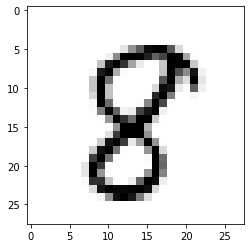

In [ ]:
# visualization
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print("Label : ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction : ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap = "Greys", interpolation = "nearest") # nearest interpolation : when a small image is scaled up.
plt.show()
